In [1]:
import glob
import json
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# from utils import get_data

In [5]:
def get_data():
    """ simple wrapper function to get data """
    with open('./data/ground_truth.json') as f:
        ground_truth = json.load(f)
    
    with open('./data/predictions.json') as f:
        predictions = json.load(f)

    return ground_truth, predictions

In [13]:
def viz(ground_truth):
    """
    create a grid visualization of images with color coded bboxes
    args:
    - ground_truth [list[dict]]: ground truth data
    """
    paths = glob.glob('./data/images/*')

    # mapping to access data faster
    gtdic = {}
    for gt in ground_truth:
        gtdic[gt['filename']] = gt

    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    f, ax = plt.subplots(4, 5, figsize=(20, 10))
    for i in range(20):
        x = i % 4
        y = i % 5

        filename = os.path.basename(paths[i])
        img = Image.open(paths[i])
        ax[x, y].imshow(img)

        bboxes = gtdic[filename]['boxes']
        classes = gtdic[filename]['classes']
        
        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl])
            ax[x, y].add_patch(rec)
        ax[x ,y].axis('off')
    plt.tight_layout()
    plt.show()

In [14]:
# if __name__ == "__main__": 
#     ground_truth, _ = get_data()
#     viz(ground_truth)

In [15]:
ground_truth, _ = get_data()

In [16]:
ground_truth[0]

{'boxes': [[576, 545, 617, 584],
  [551, 628, 573, 651],
  [508, 437, 646, 552],
  [584, 1021, 679, 1057],
  [521, 716, 627, 756],
  [550, 711, 600, 729],
  [586, 558, 630, 617],
  [614, 76, 653, 105],
  [567, 910, 598, 927],
  [604, 1188, 826, 1244],
  [561, 542, 579, 563],
  [557, 654, 583, 684],
  [589, 1190, 655, 1240],
  [562, 559, 578, 578],
  [603, 1723, 857, 1821],
  [578, 881, 686, 923],
  [586, 942, 671, 971],
  [581, 996, 661, 1023],
  [597, 1105, 761, 1250],
  [586, 625, 646, 703],
  [558, 892, 589, 908],
  [593, 907, 684, 941],
  [577, 987, 650, 1014],
  [569, 1593, 613, 1613],
  [577, 1109, 665, 1129],
  [560, 942, 601, 963],
  [574, 1107, 665, 1149],
  [525, 321, 682, 466],
  [599, 1151, 809, 1206],
  [560, 608, 594, 642],
  [581, 512, 639, 537],
  [538, 685, 577, 706],
  [541, 543, 581, 591],
  [611, 94, 671, 123],
  [582, 1069, 681, 1110],
  [562, 900, 604, 918],
  [588, 1723, 900, 1872],
  [557, 870, 608, 883],
  [565, 956, 633, 983],
  [644, 0, 912, 192],
  [545, 643

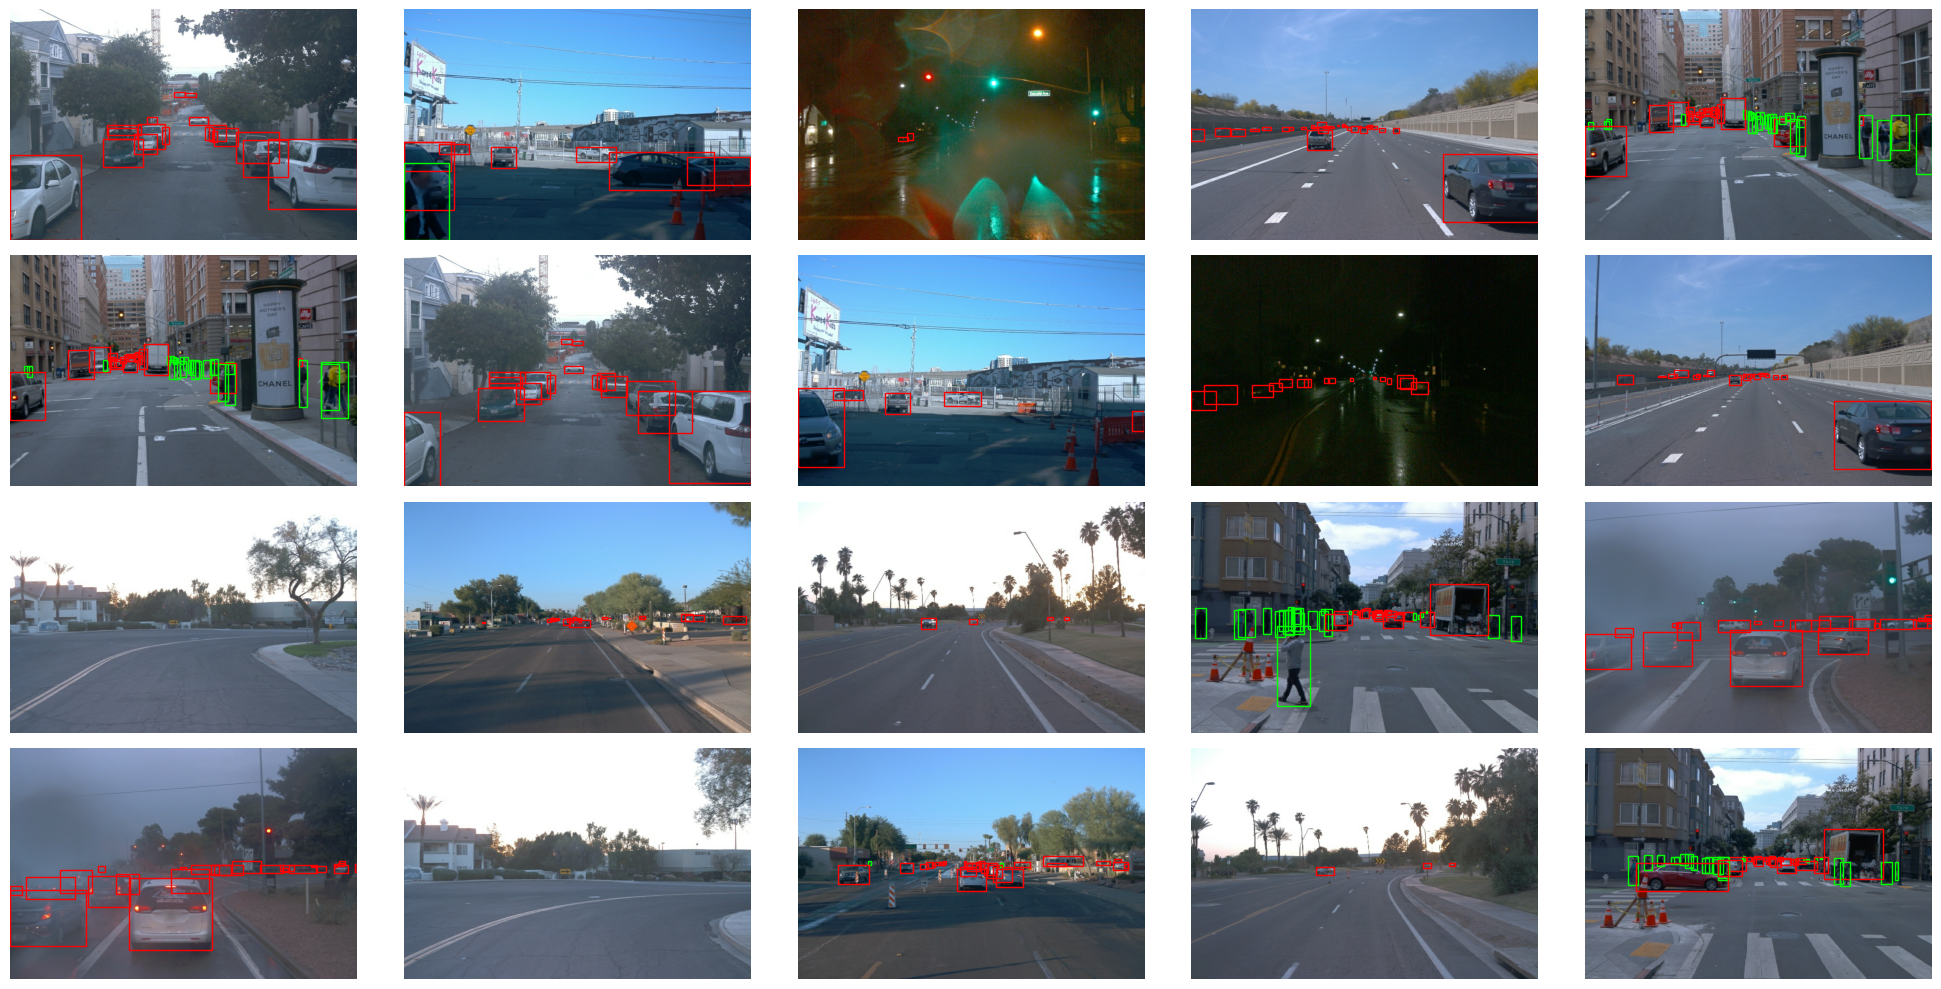

In [17]:
viz(ground_truth)